In [1]:
!pip install keras

In [2]:
#Librerias
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2
import random
from shutil import rmtree
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.callbacks import TensorBoard
from keras.utils import to_categorical
#from keras_preprocessing.image import load_img, img_to_array, array_to_img, save_img

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#NHS TIPO NIC1 SEG
#307
image_ids_array = ['I264211_C1.jpg', 'I169320_C2.jpg', 'I166612_C1.jpg', 'I169320_C1.jpg', 'I166612_C2.jpg', 'I150818_C2.jpg', 'I150818_C1.jpg', 'I149745_C2.jpg', 'I149745_C1.jpg', 'I133591_C2.jpg', 'I126100_C1.jpg', 'I133591_C1.jpg', 'I126100_C2.jpg', 'I124361_C1.jpg', 'I103738_C1.jpg', 'I103738_C2.jpg', 'I124361_C2.jpg', 'I124032_C2.jpg', 'I124032_C1.jpg', 'I264211_C2.jpg', 'I342192_C2.jpg', 'I342192_C1.jpg', 'I339977_C2.jpg', 'I335731_C2.jpg', 'I326517_C1.jpg', 'I324210_C2.jpg', 'I339977_C1.jpg', 'I335731_C1.jpg', 'I326517_C2.jpg', 'I324210_C1.jpg', 'I298042_C2.jpg', 'I295650_C1.jpg', 'I295650_C2.jpg', 'I293440_C1.jpg', 'I274386_C2.jpg', 'I293440_C2.jpg', 'I313616_C2.jpg', 'I298042_C1.jpg', 'I313616_C1.jpg', 'I274386_C1.jpg', 'I522521_C1.jpg', 'I517492_C2.jpg', 'I493937_C1.jpg', 'I493937_C2.jpg', 'I517492_C1.jpg', 'I505766_C2.jpg', 'I505766_C1.jpg', 'I474789_C1.jpg', 'I478042_C1.jpg', 'I478042_C2.jpg', 'I474789_C2.jpg', 'I466728_C2.jpg', 'I466728_C1.jpg', 'I437637_C1.jpg', 'I437637_C2.jpg', 'I371059_C2.jpg', 'I368134_C2.jpg', 'I368134_C1.jpg', 'I371059_C1.jpg', 'I352381_C2.jpg', 'I352381_C1.jpg', 'I635482_C1.jpg', 'I633710_C1.jpg', 'I633710_C2.jpg', 'I630618_C1.jpg', 'I630618_C2.jpg', 'I608976_C2.jpg', 'I608935_C1.jpg', 'I608976_C1.jpg', 'I608935_C2.jpg', 'I595301_C2.jpg', 'I592231_C2.jpg', 'I592231_C1.jpg', 'I595301_C1.jpg', 'I584458_C1.jpg', 'I584458_C2.jpg', 'I580816_C1.jpg', 'I580149_C1.jpg', 'I580816_C2.jpg', 'I580149_C2.jpg', 'I545787_C2.jpg', 'I579989_C1.jpg', 'I535966_C2.jpg', 'I545787_C1.jpg', 'I579989_C2.jpg', 'I535966_C1.jpg', 'I527027_C1.jpg', 'I527027_C2.jpg', 'I522521_C2.jpg', 'I743469_C1.jpg', 'I743435_C2.jpg', 'I704275_C2.jpg', 'I743333_C1.jpg', 'I677963_C1.jpg', 'I702418_C1.jpg', 'I691209_C2.jpg', 'I743333_C2.jpg', 'I702418_C2.jpg', 'I704275_C1.jpg', 'I691209_C1.jpg', 'I677963_C2.jpg', 'I662039_C1.jpg', 'I643611_C1.jpg', 'I672531_C1.jpg', 'I662039_C2.jpg', 'I672531_C2.jpg', 'I668441_C2.jpg', 'I668441_C1.jpg', 'I643611_C2.jpg', 'I635482_C2.jpg', 'I743893_C1.jpg', 'I743892_C2.jpg', 'I743892_C1.jpg', 'I743874_C1.jpg', 'I743834_C2.jpg', 'I743874_C2.jpg', 'I743834_C1.jpg', 'I743827_C2.jpg', 'I743714_C2.jpg', 'I743827_C1.jpg', 'I743704_C2.jpg', 'I743635_C2.jpg', 'I743624_C1.jpg', 'I743624_C2.jpg', 'I743635_C1.jpg', 'I743507_C1.jpg', 'I743507_C2.jpg', 'I743622_C2.jpg', 'I743550_C1.jpg', 'I743622_C1.jpg', 'I743476_C2.jpg', 'I744362_C1.jpg', 'I744351_C1.jpg', 'I744351_C2.jpg', 'I744335_C2.jpg', 'I744345_C2.jpg', 'I744345_C1.jpg', 'I744294_C2.jpg', 'I744335_C1.jpg', 'I744294_C1.jpg', 'I744206_C2.jpg', 'I744175_C1.jpg', 'I744206_C1.jpg', 'I744114_C2.jpg', 'I744131_C1.jpg', 'I744175_C2.jpg', 'I744129_C1.jpg', 'I744131_C2.jpg', 'I744129_C2.jpg', 'I744114_C1.jpg', 'I744029_C2.jpg', 'I743893_C2.jpg', 'I743951_C2.jpg', 'I743951_C1.jpg', 'I744029_C1.jpg', 'I744074_C2.jpg', 'I744074_C1.jpg', 'I744068_C2.jpg', 'I744068_C1.jpg', 'I744722_C1.jpg', 'I744694_C2.jpg', 'I744691_C2.jpg', 'I744694_C1.jpg', 'I744691_C1.jpg', 'I744599_C2.jpg', 'I744606_C2.jpg', 'I744606_C1.jpg', 'I744624_C2.jpg', 'I744624_C1.jpg', 'I744599_C1.jpg', 'I744548_C2.jpg', 'I744457_C2.jpg', 'I744443_C2.jpg', 'I744472_C2.jpg', 'I744457_C1.jpg', 'I744548_C1.jpg', 'I744406_C2.jpg', 'I744472_C1.jpg', 'I744406_C1.jpg', 'I744443_C1.jpg', 'I744362_C2.jpg', 'I745157_C1.jpg', 'I745139_C2.jpg', 'I745136_C2.jpg', 'I745139_C1.jpg', 'I745136_C1.jpg', 'I745096_C2.jpg', 'I745085_C2.jpg', 'I745092_C2.jpg', 'I745096_C1.jpg', 'I745092_C1.jpg', 'I745024_C2.jpg', 'I745047_C2.jpg', 'I745047_C1.jpg', 'I745085_C1.jpg', 'I745024_C1.jpg', 'I744912_C2.jpg', 'I744912_C1.jpg', 'I744778_C2.jpg', 'I744751_C2.jpg', 'I744751_C1.jpg', 'I744722_C2.jpg', 'I744732_C2.jpg', 'I744778_C1.jpg', 'I744732_C1.jpg', 'I745824_C2.jpg', 'I745838_C2.jpg', 'I745838_C1.jpg', 'I745847_C1.jpg', 'I745796_C1.jpg', 'I745824_C1.jpg', 'I745791_C2.jpg', 'I745796_C2.jpg', 'I745756_C1.jpg', 'I745743_C1.jpg', 'I745709_C1.jpg', 'I745308_C1.jpg', 'I745543_C1.jpg', 'I745308_C2.jpg', 'I745562_C1.jpg', 'I745484_C2.jpg', 'I745290_C1.jpg', 'I745266_C1.jpg', 'I745290_C2.jpg', 'I745266_C2.jpg', 'I745232_C2.jpg', 'I745157_C2.jpg', 'I745165_C2.jpg', 'I745165_C1.jpg', 'I745232_C1.jpg', 'I746524_C1.jpg', 'I746431_C1.jpg', 'I746360_C2.jpg', 'I746360_C1.jpg', 'I746308_C2.jpg', 'I746308_C1.jpg', 'I746274_C2.jpg', 'I746259_C1.jpg', 'I746123_C1.jpg', 'I746123_C2.jpg', 'I746174_C2.jpg', 'I746072_C1.jpg', 'I746035_C2.jpg', 'I746035_C1.jpg', 'I746072_C2.jpg', 'I745983_C2.jpg', 'I745930_C2.jpg', 'I745957_C1.jpg', 'I745930_C1.jpg', 'I745847_C2.jpg', 'I745886_C2.jpg', 'I745957_C2.jpg', 'I745983_C1.jpg', 'I745964_C2.jpg', 'I745964_C1.jpg', 'I745886_C1.jpg', 'I750994_C1.jpg', 'I747684_C1.jpg', 'I751566_C1.jpg', 'I751566_C2.jpg', 'I753457_C1.jpg', 'I750994_C2.jpg', 'I753457_C2.jpg', 'I747104_C2.jpg', 'I747104_C1.jpg', 'I747028_C2.jpg', 'I746771_C2.jpg', 'I746614_C2.jpg', 'I746614_C1.jpg', 'I746692_C2.jpg', 'I746596_C1.jpg', 'I746556_C1.jpg', 'I746566_C2.jpg', 'I746692_C1.jpg', 'I746556_C2.jpg', 'I746539_C1.jpg', 'I746566_C1.jpg', 'I746524_C2.jpg', 'I746539_C2.jpg', 'I746431_C2.jpg', 'I860432_C2.jpg', 'I860432_C1.jpg', 'I858460_C2.jpg', 'I858460_C1.jpg', 'I836429_C2.jpg', 'I845923_C1.jpg', 'I850562_C1.jpg', 'I849456_C2.jpg', 'I850562_C2.jpg', 'I849456_C1.jpg', 'I845923_C2.jpg', 'I836429_C1.jpg', 'I802100_C1.jpg', 'I782433_C1.jpg', 'I810715_C1.jpg', 'I765390_C2.jpg', 'I765390_C1.jpg', 'I763975_C1.jpg', 'I802100_C2.jpg', 'I810715_C2.jpg', 'I763975_C2.jpg', 'I875628_C1.jpg', 'I862260_C1.jpg', 'I875628_C2.jpg', 'I874390_C2.jpg', 'I874390_C1.jpg', 'I862260_C2.jpg']
print(len(image_ids_array))

307


In [5]:
#Cargar Dataset CITOBOT
url="/content/drive/MyDrive/Colab Notebooks/CITOBOT/DATASET/PruebasCITOBOT_Anon.csv"
data1 = pd.read_csv(url, header=0)

data1.columns = ['CASE_NUMBER', 'CASE_ID', 'IMAGE_ID', 'PATH', 'DIAGN']
data1 = data1.loc[data1['CASE_NUMBER'] <= 'Case 223']
data1['PATH'] = data1['PATH'].str.replace("PruebasCITOBOT_Anon/", "PruebasCITOBOT_AnonSEG/")
data1 = data1[data1['CASE_NUMBER'] != 'Case 169']
data1['DIAGN'] = data1['DIAGN'].replace({3: 2})
data1['DIAGN'] = data1['DIAGN'].replace({4: 2})
data1 = data1[data1['DIAGN'] != 5]
print(data1['DIAGN'].value_counts())
data1

0    265
1    116
2     34
Name: DIAGN, dtype: int64


,CASE_NUMBER,CASE_ID,IMAGE_ID,PATH,DIAGN
0,Case 001,2,20230411101755.jpg,PruebasCITOBOT_AnonSEG/Case 001/,0
1,Case 001,2,20230411101702.jpg,PruebasCITOBOT_AnonSEG/Case 001/,0
2,Case 002,2,20230411100907.jpg,PruebasCITOBOT_AnonSEG/Case 002/,0
3,Case 002,2,20230411100934.jpg,PruebasCITOBOT_AnonSEG/Case 002/,0
4,Case 003,2,20230411100207.jpg,PruebasCITOBOT_AnonSEG/Case 003/,0
...,...,...,...,...,...
505,Case 220,2,20230530100347.jpg,PruebasCITOBOT_AnonSEG/Case 220/,1
506,Case 221,2,20230530094711.jpg,PruebasCITOBOT_AnonSEG/Case 221/,0
507,Case 221,2,20230530094612.jpg,PruebasCITOBOT_AnonSEG/Case 221/,0
511,Case 223,2,20230530093319.jpg,PruebasCITOBOT_AnonSEG/Case 223/,0


In [6]:
#Cargar Dataset WHO
url2="/content/drive/MyDrive/Colab Notebooks/CITOBOT/DATASET/Dataset_WHOSeg.csv"
data2 = pd.read_csv(url2, header=0)

data2.columns = ['CASE_NUMBER', 'CASE_ID', 'IMAGE_ID', 'PATH', 'DIAGN']
data2 = data2.drop(data2[data2.IMAGE_ID == "AAJK5.jpg"].index)
data2['DIAGN'] = data2['DIAGN'].replace({3: 2})
print(data2['DIAGN'].value_counts())
data2

2    464
1    133
0    124
Name: DIAGN, dtype: int64


,CASE_NUMBER,CASE_ID,IMAGE_ID,PATH,DIAGN
0,14.0,AAHE,AAHE.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
1,14.0,AAHE,AAHE0.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
2,14.0,AAHE,AAHE1.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
3,14.0,AAHE,AAHE3.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
4,14.0,AAHE,AAHE4.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
...,...,...,...,...,...
717,184.0,AEU,AEU1.jpg,WHO_SEG/IARCImageBankVIA/Case 184/,2
718,185.0,ADF,ADF0.jpg,WHO_SEG/IARCImageBankVIA/Case 185/,2
719,185.0,ADF,ADF1.jpg,WHO_SEG/IARCImageBankVIA/Case 185/,2
720,186.0,ABK,ABK0.jpg,WHO_SEG/IARCImageBankVIA/Case 186/,2


In [7]:
#Cargar Dataset NCI
url3="/content/drive/MyDrive/Colab Notebooks/CITOBOT/DATASET/trainingDatasetSEG.csv"
data3 = pd.read_csv(url3, header=0)

data3.columns = ['PATIENT_IDR', 'IMAGE_ID', 'AGE_GRP', 'WRST_HIST_AFTER', 'WRST_HIST_AFTER_DT', 'HPV_STATUS', 'HPV_DT', 'TIMEPNT', 'PATH']

#Imagenes que no estan segmentadas =================================
data3 = data3.drop(data3[data3.IMAGE_ID == "I770636_C2.jpg"].index)
data3 = data3.drop(data3[data3.IMAGE_ID == "I862299_C2.jpg"].index)
data3 = data3.drop(data3[data3.IMAGE_ID == "I344141_C2.jpg"].index)
data3 = data3.drop(data3[data3.IMAGE_ID == "I741415_C2.jpg"].index)
data3 = data3.drop(data3[data3.IMAGE_ID == "I584615_C2.jpg"].index)
data3 = data3.drop(data3[data3.IMAGE_ID == "I325700_C1.jpg"].index)
#===================================================================

data3 = data3[((data3['PATH'] == 'training_SEG/Biopsy_Study/') & (data3['WRST_HIST_AFTER'].isin([0, 1]))) | ((data3['PATH'] == 'training_SEG/NHS/') & (data3['WRST_HIST_AFTER'] == 0))]
data3 = data3.rename(columns={'WRST_HIST_AFTER': 'DIAGN'})
data3 = data3.rename(columns={'PATIENT_IDR': 'CASE_NUMBER'})
data3 = data3.rename(columns={'AGE_GRP': 'CASE_ID'})
data3 = data3.drop('WRST_HIST_AFTER_DT', axis=1)
data3 = data3.drop('HPV_STATUS', axis=1)
data3 = data3.drop('HPV_DT', axis=1)
data3 = data3.drop('TIMEPNT', axis=1)
data3 = data3.reindex(columns=['CASE_NUMBER', 'CASE_ID', 'IMAGE_ID', 'PATH', 'DIAGN'])
#dataC1 = data3[data3['DIAGN'] == 0]
#dataC2 = data3[data3['DIAGN'] == 1]
#data_aleatoria = dataC1.sample(n=531)
#data_aleatoria2 = dataC2.sample(n=58)
#data3 = pd.concat([data_aleatoria, data_aleatoria2])
print(data3['DIAGN'].value_counts())
data3

0    531
1    192
Name: DIAGN, dtype: int64


,CASE_NUMBER,CASE_ID,IMAGE_ID,PATH,DIAGN
0,P100316,2,I389059.jpg,training_SEG/Biopsy_Study/,1
1,P101187,2,I687505.jpg,training_SEG/Biopsy_Study/,0
4,P110406,5,I239297.jpg,training_SEG/Biopsy_Study/,0
5,P111612,5,I545805.jpg,training_SEG/Biopsy_Study/,1
6,P115183,4,I149285.jpg,training_SEG/Biopsy_Study/,0
...,...,...,...,...,...
76652,P899409,5,I325700_C2.jpg,training_SEG/NHS/,0
76653,P899409,5,I553280_C1.jpg,training_SEG/NHS/,0
76654,P899409,5,I553280_C2.jpg,training_SEG/NHS/,0
76655,P899409,5,I853803_C1.jpg,training_SEG/NHS/,0


In [8]:
#Cargar Dataset Kaggle
url4="/content/drive/MyDrive/Colab Notebooks/CITOBOT/DATASET/kaggleDataset_SEG.csv"
data4 = pd.read_csv(url4, header=0)

data4.columns = ['CASE_NUMBER', 'CASE_ID', 'IMAGE_ID', 'PATH', 'DIAGN']
#data4['DIAGN'] = data4['DIAGN'].replace({2: 1})
dataC0 = data4[data4['DIAGN'] == 0]
dataC1 = data4[data4['DIAGN'] == 1]
dataC2 = data4[data4['DIAGN'] == 2]
data_aleatoria0 = dataC0.sample(n=244)
data_aleatoria1 = dataC1.sample(n=574)
data_aleatoria2 = dataC2.sample(n=435)
data4 = pd.concat([data_aleatoria0, data_aleatoria1, data_aleatoria2])
print(data4['DIAGN'].value_counts())
data4

1    574
2    435
0    244
Name: DIAGN, dtype: int64


,CASE_NUMBER,CASE_ID,IMAGE_ID,PATH,DIAGN
153,0,0,523.jpg,Kaggle_SEG/Type_1/,0
41,0,0,1226.jpg,Kaggle_SEG/Type_1/,0
66,0,0,138.jpg,Kaggle_SEG/Type_1/,0
213,0,0,810.jpg,Kaggle_SEG/Type_1/,0
116,0,0,34.jpg,Kaggle_SEG/Type_1/,0
...,...,...,...,...,...
1357,0,0,689.jpg,Kaggle_SEG/Type_3/,2
1426,0,0,878.jpg,Kaggle_SEG/Type_3/,2
1252,0,0,344.jpg,Kaggle_SEG/Type_3/,2
1319,0,0,573.jpg,Kaggle_SEG/Type_3/,2


In [9]:
data = pd.concat([data2, data3, data4])
data

,CASE_NUMBER,CASE_ID,IMAGE_ID,PATH,DIAGN
0,14.0,AAHE,AAHE.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
1,14.0,AAHE,AAHE0.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
2,14.0,AAHE,AAHE1.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
3,14.0,AAHE,AAHE3.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
4,14.0,AAHE,AAHE4.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
...,...,...,...,...,...
1357,0,0,689.jpg,Kaggle_SEG/Type_3/,2
1426,0,0,878.jpg,Kaggle_SEG/Type_3/,2
1252,0,0,344.jpg,Kaggle_SEG/Type_3/,2
1319,0,0,573.jpg,Kaggle_SEG/Type_3/,2


In [10]:
#Distribuir clases (3)
print(data['DIAGN'].value_counts())

0    899
1    899
2    899
Name: DIAGN, dtype: int64


In [11]:
#Balancear Clase de Salida.
#g = data.groupby('DIAGN')
#dataBal = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))
#data = dataBal
#print(data['DIAGN'].value_counts())

In [12]:
#Procesar y Cargar Imagenes

def process_image(filepath):
  img = tf.io.read_file(filepath)
  img = tf.image.decode_jpeg(img)
  img = tf.image.resize(img, [224, 224])
  img = tf.image.rgb_to_grayscale(img)  # convertir a escala de grises
  img = tf.image.convert_image_dtype(img, tf.float32)  # convertir a tipo float32
  img /= 255.0  # Normalizar píxeles al rango [0, 1]
  return img

In [13]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range = 40,
    zoom_range = 0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    vertical_flip = True
)

In [14]:
#Arquitectura VGGNET
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Conv2D, MaxPooling2D,Flatten,BatchNormalization
#from keras.utils import np_utils,multi_gpu_model

def modelCompile():
  model = Sequential()
  model.add(Conv2D(64, (3, 3), strides=(1, 1), input_shape=(224,224,1), padding='same', activation='relu',
                    kernel_initializer='uniform'))
  model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='uniform'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(128, (3, 2), strides=(1, 1), padding='same', activation='relu', kernel_initializer='uniform'))
  model.add(Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='uniform'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='uniform'))
  model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='uniform'))
  model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='uniform'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='uniform'))
  model.add(Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='uniform'))
  model.add(Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='uniform'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='uniform'))
  model.add(Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='uniform'))
  model.add(Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='uniform'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(2048, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(2048, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(3, activation='softmax'))
  #model = multi_gpu_model(model, gpus=2)
  #model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
  model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), metrics=['accuracy'])
  return model

model = modelCompile()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      640       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     49280     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                   

Iteracion:  1
Epoch 1/150
54/54 [==============================] - 60s 669ms/step - loss: 1.1003 - accuracy: 0.3374 - val_loss: 1.0961 - val_accuracy: 0.3681
Epoch 2/150
54/54 [==============================] - 24s 440ms/step - loss: 1.0761 - accuracy: 0.4110 - val_loss: 1.0656 - val_accuracy: 0.3958
Epoch 3/150
54/54 [==============================] - 24s 443ms/step - loss: 1.0753 - accuracy: 0.4238 - val_loss: 1.0339 - val_accuracy: 0.4653
Epoch 4/150
54/54 [==============================] - 23s 433ms/step - loss: 1.0503 - accuracy: 0.4655 - val_loss: 1.0689 - val_accuracy: 0.4074
Epoch 5/150
54/54 [==============================] - 24s 435ms/step - loss: 1.0347 - accuracy: 0.4725 - val_loss: 1.0164 - val_accuracy: 0.4653
Epoch 6/150
54/54 [==============================] - 24s 439ms/step - loss: 1.0228 - accuracy: 0.4875 - val_loss: 0.9807 - val_accuracy: 0.5162
Epoch 7/150
54/54 [==============================] - 24s 436ms/step - loss: 1.0138 - accuracy: 0.4748 - val_loss: 0.9861 -

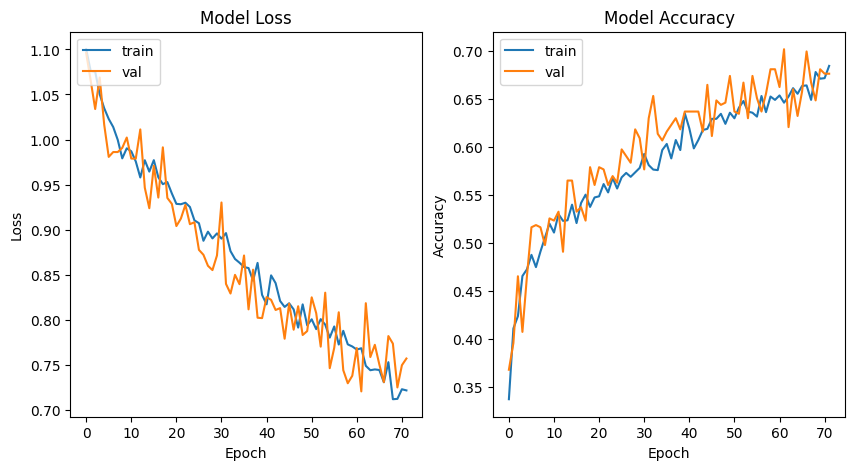

17/17 [==============================] - 13s 790ms/step
Clase 0:
Especificidad: 0.9378378378378378
Sensibilidad: 0.5411764705882353

Clase 1:
Especificidad: 0.8132183908045977
Sensibilidad: 0.6145833333333334

Clase 2:
Especificidad: 0.7237569060773481
Sensibilidad: 0.797752808988764


Matriz de Confusión:
[[ 92  40  38]
 [ 12 118  62]
 [ 11  25 142]]
Specificity:  [0.9378378378378378, 0.8132183908045977, 0.7237569060773481]
Sensitivity:  [0.5411764705882353, 0.6145833333333334, 0.797752808988764]
Accuracy:  0.6518518518518519
Precision:  [0.8        0.64480874 0.58677686]
Recall:     [0.54117647 0.61458333 0.79775281]
F1score:    [0.64561404 0.62933333 0.67619048]
Iteracion:  2
Epoch 1/150
54/54 [==============================] - 28s 450ms/step - loss: 1.0995 - accuracy: 0.3542 - val_loss: 1.0979 - val_accuracy: 0.3495
Epoch 2/150
54/54 [==============================] - 24s 444ms/step - loss: 1.0865 - accuracy: 0.4064 - val_loss: 1.0669 - val_accuracy: 0.4259
Epoch 3/150
54/54 [=====

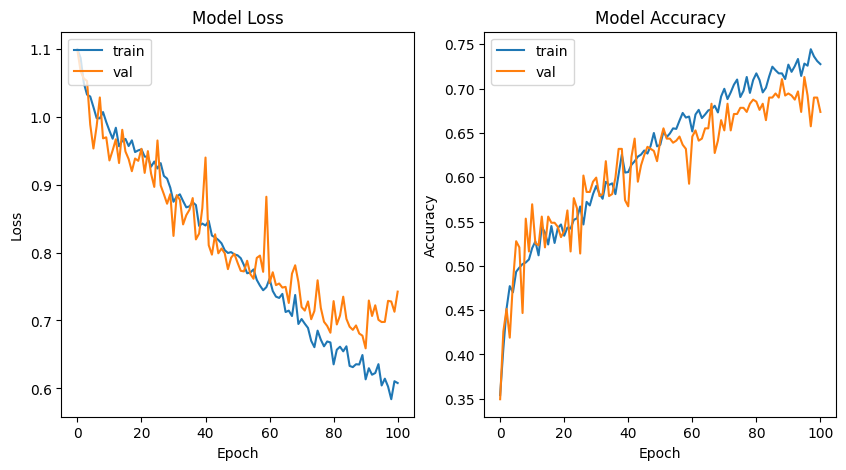

17/17 [==============================] - 13s 753ms/step
Clase 0:
Especificidad: 0.898936170212766
Sensibilidad: 0.6707317073170732

Clase 1:
Especificidad: 0.8368580060422961
Sensibilidad: 0.6507177033492823

Clase 2:
Especificidad: 0.8096514745308311
Sensibilidad: 0.7844311377245509


Matriz de Confusión:
[[110  29  25]
 [ 27 136  46]
 [ 11  25 131]]
Specificity:  [0.898936170212766, 0.8368580060422961, 0.8096514745308311]
Sensitivity:  [0.6707317073170732, 0.6507177033492823, 0.7844311377245509]
Accuracy:  0.6981481481481482
Precision:  [0.74324324 0.71578947 0.64851485]
Recall:     [0.67073171 0.6507177  0.78443114]
F1score:    [0.70512821 0.68170426 0.7100271 ]
Iteracion:  3
Epoch 1/150
54/54 [==============================] - 29s 454ms/step - loss: 1.0963 - accuracy: 0.3542 - val_loss: 1.1634 - val_accuracy: 0.3310
Epoch 2/150
54/54 [==============================] - 24s 447ms/step - loss: 1.0728 - accuracy: 0.4093 - val_loss: 1.0593 - val_accuracy: 0.4907
Epoch 3/150
54/54 [=====

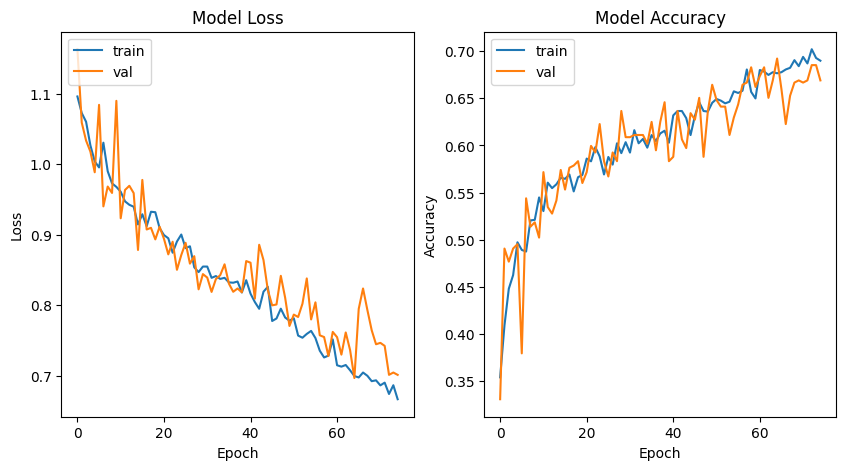

17/17 [==============================] - 13s 727ms/step
Clase 0:
Especificidad: 0.9186991869918699
Sensibilidad: 0.5672514619883041

Clase 1:
Especificidad: 0.8257372654155496
Sensibilidad: 0.6586826347305389

Clase 2:
Especificidad: 0.7692307692307693
Sensibilidad: 0.7920792079207921


Matriz de Confusión:
[[ 97  35  39]
 [ 18 110  39]
 [ 12  30 160]]
Specificity:  [0.9186991869918699, 0.8257372654155496, 0.7692307692307693]
Sensitivity:  [0.5672514619883041, 0.6586826347305389, 0.7920792079207921]
Accuracy:  0.6796296296296296
Precision:  [0.76377953 0.62857143 0.67226891]
Recall:     [0.56725146 0.65868263 0.79207921]
F1score:    [0.65100671 0.64327485 0.72727273]
Iteracion:  4
Epoch 1/150
54/54 [==============================] - 28s 450ms/step - loss: 1.0949 - accuracy: 0.3774 - val_loss: 1.0613 - val_accuracy: 0.4444
Epoch 2/150
54/54 [==============================] - 24s 446ms/step - loss: 1.0810 - accuracy: 0.3983 - val_loss: 1.0127 - val_accuracy: 0.5046
Epoch 3/150
54/54 [===

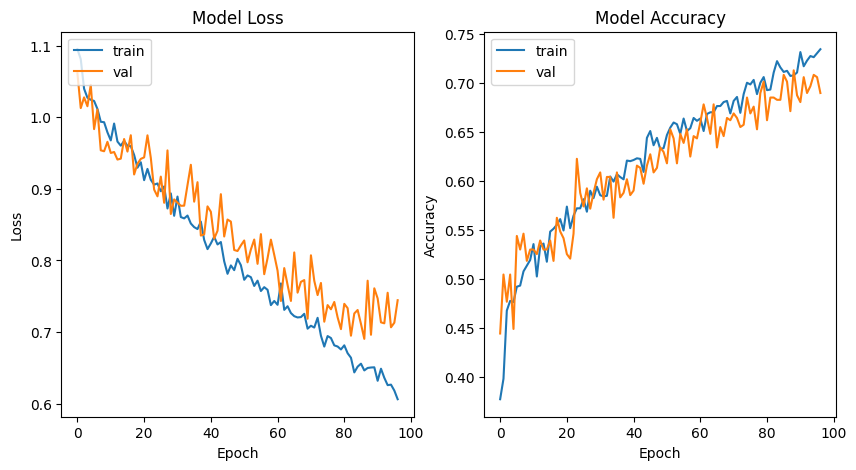

17/17 [==============================] - 13s 783ms/step
Clase 0:
Especificidad: 0.9072463768115943
Sensibilidad: 0.5641025641025641

Clase 1:
Especificidad: 0.837465564738292
Sensibilidad: 0.632768361581921

Clase 2:
Especificidad: 0.771505376344086
Sensibilidad: 0.8452380952380952


Matriz de Confusión:
[[110  42  43]
 [ 23 112  42]
 [  9  17 142]]
Specificity:  [0.9072463768115943, 0.837465564738292, 0.771505376344086]
Sensitivity:  [0.5641025641025641, 0.632768361581921, 0.8452380952380952]
Accuracy:  0.674074074074074
Precision:  [0.77464789 0.65497076 0.62555066]
Recall:     [0.56410256 0.63276836 0.8452381 ]
F1score:    [0.65281899 0.64367816 0.71898734]
Iteracion:  5
Epoch 1/150
54/54 [==============================] - 28s 450ms/step - loss: 1.0958 - accuracy: 0.3467 - val_loss: 1.0816 - val_accuracy: 0.3287
Epoch 2/150
54/54 [==============================] - 24s 438ms/step - loss: 1.0924 - accuracy: 0.3786 - val_loss: 1.1000 - val_accuracy: 0.2940
Epoch 3/150
54/54 [==========

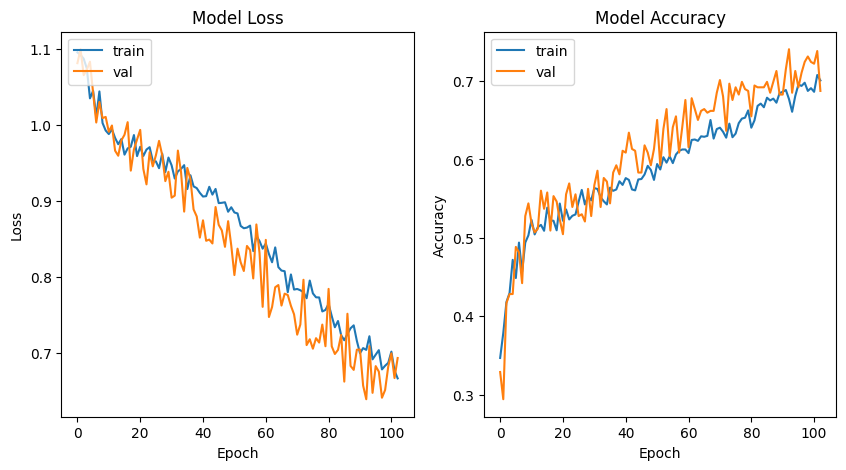

17/17 [==============================] - 12s 696ms/step
Clase 0:
Especificidad: 0.9573863636363636
Sensibilidad: 0.6276595744680851

Clase 1:
Especificidad: 0.8337950138504155
Sensibilidad: 0.7318435754189944

Clase 2:
Especificidad: 0.779291553133515
Sensibilidad: 0.7803468208092486


Matriz de Confusión:
[[118  26  44]
 [ 11 131  37]
 [  4  34 135]]
Specificity:  [0.9573863636363636, 0.8337950138504155, 0.779291553133515]
Sensitivity:  [0.6276595744680851, 0.7318435754189944, 0.7803468208092486]
Accuracy:  0.7111111111111111
Precision:  [0.88721805 0.68586387 0.625     ]
Recall:     [0.62765957 0.73184358 0.78034682]
F1score:    [0.73520249 0.70810811 0.6940874 ]
Media
Specificity:  [0.92402119 0.82941485 0.77068722]  |  Sensitivity:  [0.59418436 0.65771912 0.79996961]
Accuracy:  0.682962962962963  |  Precision:  0.6971336175059192  |  Recall:  0.683957697170652  |  F1score:  0.6814956133902795

Desviacion
Specificity:  [0.0211807  0.00911318 0.027559  ]  |  Sensitivity:  [0.04779167

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

HOLDOUT = 5

specVec,sensVec,accuVec,precVec,recVec,f1Vec=[],[],[],[],[],[]

for i in range(HOLDOUT):
  print("Iteracion: ",i+1)
  #Conjutnos de Train, Validation y Test
  x_trainPath, x_testPath, y_trainPath, y_testPath = train_test_split(data, data['DIAGN'], test_size=0.2)
  x_trainPath, x_valPath, y_trainPath, y_valPath = train_test_split(x_trainPath, y_trainPath, test_size=0.2)

  y_trainPath = np.array(y_trainPath)
  y_testPath = np.array(y_testPath)
  y_valPath = np.array(y_valPath)

  #Cargar los path de las imagenes para el pipeline
  dataPathDrive = '/content/drive/MyDrive/Colab Notebooks/CITOBOT/DATASET/'
  path_train = dataPathDrive + x_trainPath["PATH"] + x_trainPath['IMAGE_ID']
  path_test = dataPathDrive + x_testPath["PATH"] + x_testPath['IMAGE_ID']
  path_val = dataPathDrive + x_valPath["PATH"] + x_valPath['IMAGE_ID']

  path_train = np.array(path_train)
  path_test = np.array(path_test)
  path_val = np.array(path_val)

  #Convertir en tensores
  data_train = tf.data.Dataset.from_tensor_slices(path_train)
  data_test = tf.data.Dataset.from_tensor_slices(path_test)
  data_val = tf.data.Dataset.from_tensor_slices(path_val)

  #Procesar y Cargar Imagenes
  data_train = data_train.map(process_image)
  data_test = data_test.map(process_image)
  data_val = data_val.map(process_image)

  train = tf.data.Dataset.from_tensor_slices(to_categorical(y_trainPath, 3))
  train = tf.data.Dataset.zip((data_train,train))

  test = tf.data.Dataset.from_tensor_slices(to_categorical(y_testPath, 3))
  test = tf.data.Dataset.zip((data_test,test))

  val = tf.data.Dataset.from_tensor_slices(to_categorical(y_valPath, 3))
  val = tf.data.Dataset.zip((data_val,val))

  AS = train.batch(batch_size=32)
  AST = test.batch(batch_size=32)
  ASV = val.batch(batch_size=32)

  #Aplicar aumento de datos
  x_train = np.array(list(data_train.as_numpy_iterator()))
  y_train = np.array(list(train.as_numpy_iterator()), dtype=object)
  y_train = np.array([y[1] for y in y_train])

  x_val = np.array(list(data_val.as_numpy_iterator()))
  y_val = np.array(list(val.as_numpy_iterator()), dtype=object)
  y_val = np.array([y[1] for y in y_val])

  data_gen_train = datagen.flow(x_train, y_train, batch_size=32)
  data_gen_val = datagen.flow(x_val, y_val, batch_size=32)

  #Cargar Modelo
  model = modelCompile()

  #Entrenar
  callbackMed=tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=0,
        patience=10,
        verbose=0,
        mode='auto',
        baseline=None,
        restore_best_weights=True
    )

  history = model.fit(data_gen_train, epochs=150, verbose=1, validation_data= data_gen_val, callbacks=[callbackMed, TensorBoard(log_dir='./cnntmp/log')])

  #Grafica Rendimiento ========================================
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

  ax1.plot(history.history['loss'])
  ax1.plot(history.history['val_loss'])
  ax1.set_title('Model Loss')
  ax1.set_ylabel('Loss')
  ax1.set_xlabel('Epoch')
  ax1.legend(['train', 'val'], loc='upper left')

  ax2.plot(history.history['accuracy'])
  ax2.plot(history.history['val_accuracy'])
  ax2.set_title('Model Accuracy')
  ax2.set_ylabel('Accuracy')
  ax2.set_xlabel('Epoch')
  ax2.legend(['train', 'val'], loc='upper left')
  plt.show()
  #===========================================================
  model.evaluate(AST)
  pred = model.predict(AST)

  y_testPath = list(y_testPath)
  pred_label=[np.argmax(pred[i]) for i in range(pred.shape[0])]

  mat=confusion_matrix(y_testPath, pred_label)

  num_classes = len(set(y_testPath))
  specificity = []
  sensitivity = []
  for i in range(num_classes):
      tp = mat[i, i]
      tn = sum(sum(mat) - mat[i, :] - mat[:, i]) + tp
      fp = sum(mat[:, i]) - tp
      fn = sum(mat[i, :]) - tp
      specificity_i = tn / (tn + fp)
      sensitivity_i = tp / (tp + fn)
      specificity.append(specificity_i)
      sensitivity.append(sensitivity_i)

  for i in range(num_classes):
      print(f"Clase {i}:")
      print("Especificidad:", specificity[i])
      print("Sensibilidad:", sensitivity[i])
      print()


  specVec.append(specificity)
  sensVec.append(sensitivity)
  accuVec.append(accuracy_score(y_testPath,pred_label))
  precVec.append(precision_score(y_testPath,pred_label,average=None,zero_division=0))
  recVec.append(recall_score(y_testPath,pred_label,average=None,zero_division=0))
  f1Vec.append(f1_score(y_testPath,pred_label,average=None,zero_division=0))
  print()
  print("Matriz de Confusión:")
  print(mat)
  print("Specificity: ",specificity)
  print("Sensitivity: ",sensitivity)
  print("Accuracy: ",accuracy_score(y_testPath,pred_label))
  print("Precision: ",precision_score(y_testPath,pred_label,average=None,zero_division=0))
  print("Recall:    ",recall_score(y_testPath,pred_label,average=None,zero_division=0))
  print("F1score:   ",f1_score(y_testPath,pred_label,average=None,zero_division=0))
  print("=====================================")

print("Media")
print("Specificity: ",np.mean(specVec, axis=0)," | ","Sensitivity: ",np.mean(sensVec, axis=0))
print("Accuracy: ",np.mean(accuVec)," | ","Precision: ",np.mean(precVec)," | ","Recall: ",np.mean(recVec)," | ","F1score: ",np.mean(f1Vec))
print()
print("Desviacion")
print("Specificity: ",np.std(specVec, axis=0)," | ","Sensitivity: ",np.std(sensVec, axis=0))
print("Accuracy: ",np.std(accuVec)," | ","Precision: ",np.std(precVec)," | ","Recall: ",np.std(recVec)," | ","F1score: ",np.std(f1Vec))